## Linear Neural Networks

The same model selection process can also be used when choosing between different neural network architectures. In this section, you will create the models shown below and apply it to the same regression task above.

### Prepare the Data

You will use the same training, cross validation, and test sets you generated in the previous section. From earlier lectures in this course, you may have known that neural networks can learn non-linear relationships so you can opt to skip adding polynomial features. The code is still included below in case you want to try later and see what effect it will have on your results. The default `degree` is set to `1` to indicate that it will just use `x_train`, `x_cv`, and `x_test` as is (i.e. without any additional polynomial features).

In [9]:
# for array computations and loading data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for graphing and visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# for building an training neural networks
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# reduce display precision on numpy arrays
np.set_printoptions(precision = 2)

# surpress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [10]:
# Load the dataset from the csv file
data = np.loadtxt('./linear.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# Convert 1-D array data into 2-D arrays for later commands 
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"Shape of Inputs x: {x.shape}")
print(f"Shape of Outputs y: {y.shape}")

Shape of Inputs x: (50, 1)
Shape of Outputs y: (50, 1)


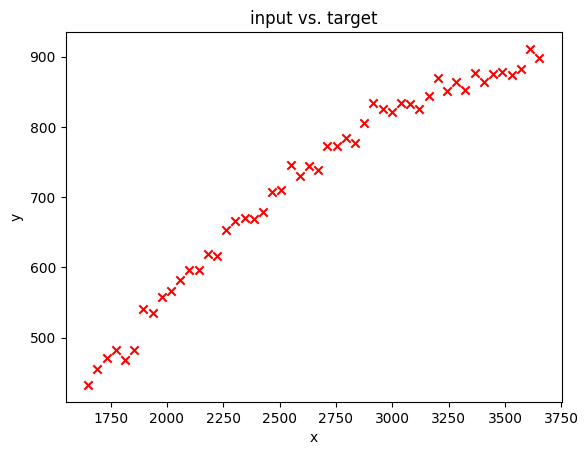

In [11]:
# Plot the entire dataset
plt.scatter(x, y, marker='x', c='r')
plt.title("input vs. target")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [12]:
# Get 60% of the dataset as the training set. Put the remaining 40% into temp variables
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the remaining 40% into 20% cross validation set and 20% test set
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=1)

# Delete temp variables
del x_temp, y_temp

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


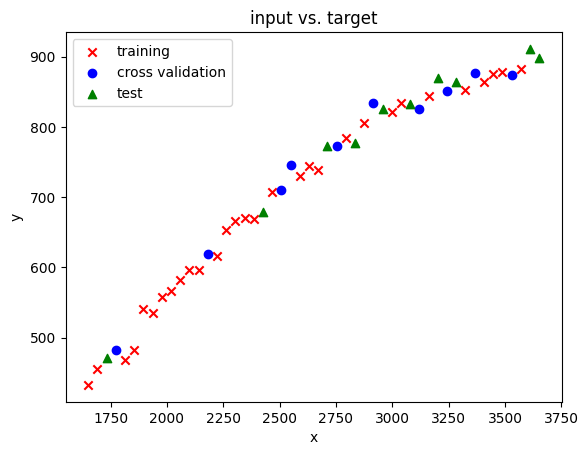

In [13]:
plt.scatter(x_train, y_train, marker='x', c='r', label='training'); 
plt.scatter(x_cv, y_cv, marker='o', c='b', label='cross validation'); 
plt.scatter(x_test, y_test, marker='^', c='g', label='test'); 
plt.title("input vs. target")
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend()
plt.show()

In [29]:
# Add polynomial features and scale features for training, cross validation, and test sets
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
scaler = StandardScaler()

# X_train (use fit_transform because we are training our model with X_train)
X_train_mapped = poly.fit_transform(x_train)
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)

# X_cv (use only transform because we are not training our model with X_cv)
X_cv_mapped = poly.transform(x_cv)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)

# X_test (use only transform because we are not training our model with X_test)
X_test_mapped = poly.transform(x_test)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

### Build and train the models

You will then create the neural network architectures shown earlier.

You will use the created models in a loop then proceed to train the models. For each model, you will also record the training and cross validation errors.

In [31]:
# Build the models
tf.random.set_seed(20)

model_1 = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(1, activation = 'linear')
    ],
    name='model_1'
)

model_2 = Sequential(
    [
        Dense(20, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1, activation = 'linear')
    ],
    name='model_2'
)

model_3 = Sequential(
    [
        Dense(32, activation = 'relu'),
        Dense(16, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(1, activation = 'linear')
    ],
    name='model_3'
)

nn_models = [model_1, model_2, model_3]

In [33]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Loop over the models
for model in nn_models:

    # Setup the loss and optimizer
    model.compile(
        loss = 'mse',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # Train model
    model.fit(
        X_train_mapped_scaled, y_train, epochs=300, verbose = 0
    )

    print("Done!\n")

    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

# Print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
    )

Training model_1...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Training model_2...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Training model_3...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
RESULTS:
Model 1: Training MSE: 406.19, CV MSE: 551.78
Model 2: Training MSE: 73.38, CV MSE: 112.67
Model 3: Training MSE: 75.39, CV MSE: 98.79


From the recorded errors, you can decide which is the best model for your application. Look at the results above and see if you agree with the selected `model_num` below. Finally, you will compute the test error to estimate how well it generalizes to new examples.

In [34]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Selected Model: 3
Training MSE: 75.39
Cross Validation MSE: 98.79
Test MSE: 112.58
